# Linear Regression Demo: Predict Mean Daily AC Output of Solar Plant
2020-01-22

In [88]:
# Import dependencies.
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm

In [122]:
# Import datasets.
# https://www.kaggle.com/anikannal/solar-power-generation-data
plants = pd.read_csv('./data/Plant_generation_daily_means.csv')
sensors = pd.read_csv('./data/Plant_Weather_Sensor_Data_daily_means.csv')

In [15]:
# View first 5 rows of solar plant data.
plants.head()

,PLANT_ID,Date[DATE_TIME],Mean_DC_POWER,Mean_AC_POWER,Mean_DAILY_YIELD,Mean_TOTAL_YIELD
0,4135001,2020/01/06,2466.919523,241.331203,3024.615471,6.981186e+06
1,4135001,2020/02/06,3176.154636,310.664545,2981.198957,6.988686e+06
2,4135001,2020/03/06,3215.182076,314.473927,3666.657630,6.994436e+06
3,4135001,2020/04/06,3567.754122,348.818318,2968.519653,6.998047e+06
4,4135001,2020/05/06,3316.573958,324.314498,3069.291804,7.012397e+06


In [16]:
# View first 5 rows of solar sensor data.
sensors.head()

,Date[DATE_TIME],PLANT_ID,Mean_AMBIENT_TEMPERATURE,Mean_MODULE_TEMPERATURE,Mean_IRRADIATION
0,2020/05/15,4135001,27.430823,32.582964,0.204699
1,2020/05/15,4136001,30.565992,35.559493,0.300622
2,2020/05/16,4135001,26.780538,31.858851,0.211951
3,2020/05/16,4136001,29.478612,35.143314,0.246631
4,2020/05/17,4135001,26.686727,32.740435,0.238869


In [99]:
# Inner join solar and sensor data on 'PLANT_ID' and 'Date[DATE_TIME]'.
data = pd.merge(plants, sensors
                , on=['PLANT_ID', 'Date[DATE_TIME]']
                , how='inner'
               ).sort_values('Date[DATE_TIME]')

In [31]:
# Rename joined columns to something easier to work with.
data_cols = ['plant_id', 'date']
num_cols = ['mean_dc', 'mean_ac', 'mean_daily_yield', 'mean_total_yield', 'mean_amb_temp', 'mean_mod_temp', 'mean_irr']
data_cols.extend(num_cols)
data.columns = data_cols

In [89]:
# Split data into 70%/30% training/validation sets.
val_df = data.sample(frac=0.3)
train_df = data.drop(val_df.index)

In [90]:
# Look for missing values and numerical ranges in training data.
train_df.describe()

,plant_id,mean_dc,mean_ac,mean_daily_yield,mean_total_yield,mean_amb_temp,mean_mod_temp,mean_irr
count,4.000000e+01,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000
mean,4.135576e+06,1485.763966,267.231825,3251.718290,3.803839e+08,26.969083,32.074467,0.226656
std,5.006406e+02,1522.083134,60.543304,615.421856,3.263424e+08,1.826504,2.722107,0.046937
min,4.135001e+06,178.018653,174.010193,1982.563470,6.856087e+06,23.850938,26.668631,0.124383
25%,4.135001e+06,237.996184,226.938695,2810.475384,6.971012e+06,25.498433,29.979129,0.198407
50%,4.136001e+06,287.374510,258.025497,3352.274190,6.320208e+08,26.872036,32.530925,0.226716
75%,4.136001e+06,2889.123084,284.730516,3697.926768,6.437208e+08,28.153453,34.061959,0.260017
max,4.136001e+06,4896.060547,478.597737,4394.764566,7.590320e+08,30.400938,37.034485,0.313869


## Multivariate Analysis: Scatter Plot Matrix
Look for correlations among numerical variables.

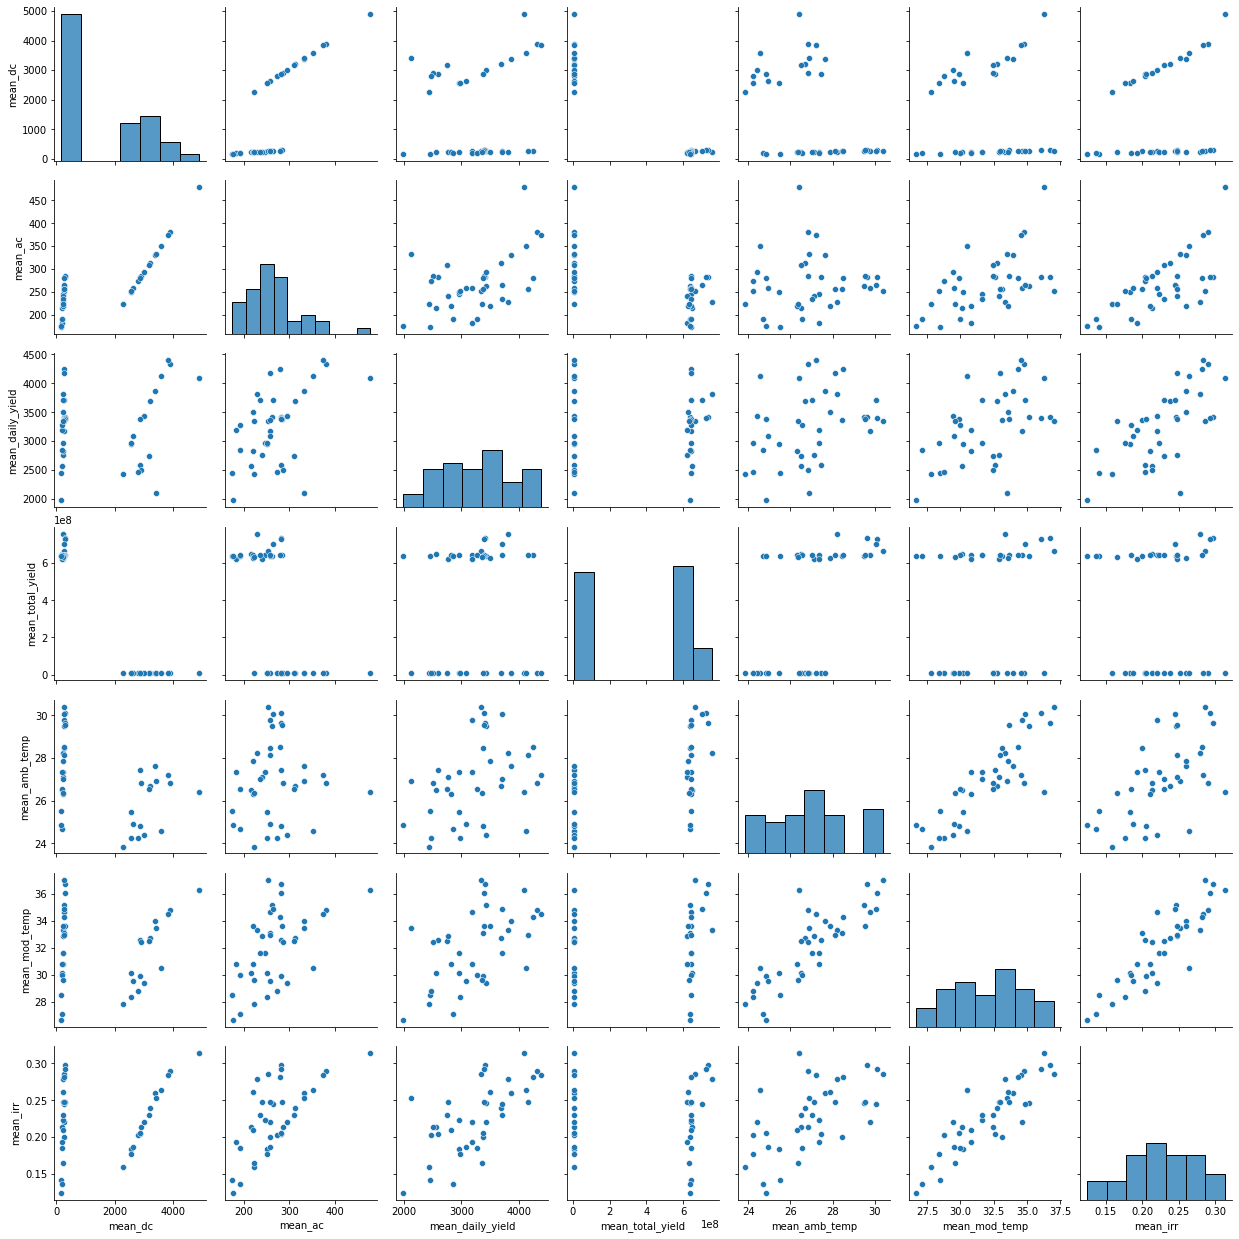

In [91]:
scatter = sns.pairplot(train_df[num_cols])

## Multicolinearity
Look for pairs of variables that could cause high VIFs.

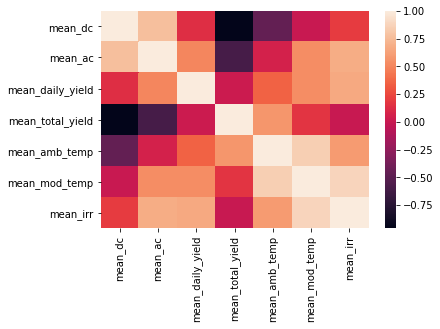

In [92]:
correlations = train_df[num_cols].corr()
heatmap = sns.heatmap(correlations)

## Fit Linear Regression Model: Statsmodels
https://www.statsmodels.org/

In [117]:
ols = sm.ols("mean_ac ~ mean_amb_temp + mean_mod_temp + mean_irr", data=train_df)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mean_ac   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     50.90
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           4.95e-13
Time:                        12:24:44   Log-Likelihood:                -187.25
No. Observations:                  40   AIC:                             382.5
Df Residuals:                      36   BIC:                             389.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       279.8584     74.804      3.741      0.001     128.149     431.567
mean_amb_temp   -44.7648      5.688     -7.869      0.000     -56.301     -33.228
mean_mod_temp    37.0845      6.529      5.680      0.000      23.844      50.325
mean_irr         22.8129    251.162      0.091      0.928    -486.568     532.194
==============================================================================
Omnibus:                        2.324   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.347
Skew:                          -0.147   Prob(JB):                        0.510
Kurtosis:                       3.849   Cond. No.                     2.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
# In the previous model, 'mean_irr' is not significant since the p-value > 0.05. Remove it.
ols2 = sm.ols("mean_ac ~ mean_amb_temp + mean_mod_temp", data=train_df)
res2 = ols2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mean_ac   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     78.46
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           4.91e-14
Time:                        12:25:23   Log-Likelihood:                -187.26
No. Observations:                  40   AIC:                             380.5
Df Residuals:                      37   BIC:                             385.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       276.5778     64.622      4.280      0.000     145.640     407.515
mean_amb_temp   -45.0747      4.490    -10.040      0.000     -54.172     -35.978
mean_mod_temp    37.6087      3.013     12.484      0.000      31.505      43.713
==============================================================================
Omnibus:                        2.360   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.396
Skew:                          -0.130   Prob(JB):                        0.498
Kurtosis:                       3.878   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation
* Adjusted R-squared: model explains 80% of the variance in the target variable, 'mean_ac'.
* Coefficients:
    * For every one-unit increase in `mean_amb_temp`, the `mean_ac` decreases by -45 units.
    * For every one-unit increase in `mean_mod_temp`, the `mean_ac` increases by 37.6 units.

## Evaluate Results
Assumptions of OLS:<br/>
* Constant variance (homoscedasticity) of residuals (errors) by predicted values. There should be no patterns in the scatter plot.
* Residuals have mean of zero.
* Residuals are normally distributed.
* Fit Predicted (y-hat) by Actual values.

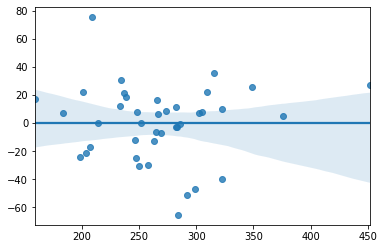

In [119]:
predicted = res2.fittedvalues
resid = res2.resid
val = sns.regplot(x=predicted, y=resid)

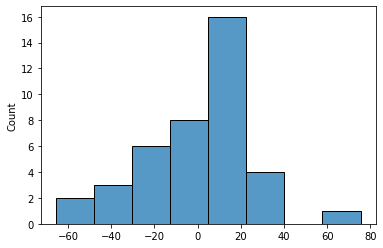

In [120]:
hist = sns.histplot(resid)

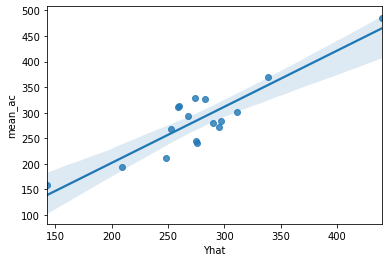

In [121]:
val_plot = sns.regplot(x='Yhat', y='mean_ac', data=val_df)

### What could we do to increase the adjusted r-squared value?